In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import time

In [2]:
# Define the Filepath for the Dataset
filepath = 'OPENDATA_BOOKING_CALL_A_BIKE.csv'

# Define the Chunksize
chunksize = 10 ** 6

# Define the specific Timerange 
date_after = pd.Timestamp('2013-12-31 23:59:59')
date_before = pd.Timestamp('2016-01-01 00:00:00')

# Define the Columns that contain Dates
dates_from_data = ['DATE_BOOKING',
                   'DATE_FROM',
                   'DATE_UNTIL']

# Define the columns that are needed from the Dataset
needed_cols = ['DATE_BOOKING' ,
               'DATE_FROM',
               'DATE_UNTIL',
               'START_RENTAL_ZONE',
               'END_RENTAL_ZONE',
               'CITY_RENTAL_ZONE']

# Definition that imports the dataset in Chunks of 1,000,000 rows to not clog the Memory
def load_csv():
    
    data_iterator = pd.read_csv(filepath,
                                chunksize=chunksize,
                                sep=';',
                                parse_dates=dates_from_data,
                                usecols=needed_cols)
    chunk_list = []  

    # Each chunk is in dataframe format
    for data_chunk in data_iterator:  
        # Filter the Data for the City Hamburg and the given Time Horizon
        filtered_chunk = data_chunk[(data_chunk['CITY_RENTAL_ZONE'] == 'Hamburg') &
                                    (data_chunk['DATE_UNTIL'] > date_after) &
                                    (data_chunk['DATE_UNTIL'] < date_before)]
        # Append the chunk into a list, so we have the continued data
        chunk_list.append(filtered_chunk)
    filtered_data = pd.concat(chunk_list)
    return filtered_data

# Time how long it takes to load the Bike Dataset and insert it into the bike_data variable
%time bike_data = load_csv()

# Format the Dates from Object to DateTime Types
bike_data['DATE_BOOKING'] = pd.to_datetime(bike_data['DATE_BOOKING'],
                                                        format='%Y%m%d %H:%M:%S')
bike_data['DATE_FROM'] = pd.to_datetime(bike_data['DATE_FROM'],
                                                        format='%Y%m%d %H:%M:%S')
bike_data['DATE_UNTIL'] = pd.to_datetime(bike_data['DATE_UNTIL'],
                                                        format='%Y%m%d %H:%M:%S')

CPU times: user 1min 23s, sys: 11.2 s, total: 1min 34s
Wall time: 1min 34s


In [3]:
bike_data

,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE
0,2014-01-01 00:34:54,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,Mönckebergstraße / Rosenstraße,Hamburg
1,2014-01-01 01:39:55,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,Schulterblatt/Eifflerstraße,Hamburg
2,2014-01-01 01:40:20,2014-01-01 01:40:20,2014-01-01 01:53:09,Weidestraße/Biedermannplatz,Jarrestraße / Rambatzweg,Hamburg
3,2014-01-01 01:56:00,2014-01-01 01:56:00,2014-01-01 01:56:41,Große Bergstraße / Jessenstraße,Große Bergstraße / Jessenstraße,Hamburg
4,2014-01-01 02:05:55,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,Bartholomäusstraße/Beim Alten Schützenhof,Hamburg
...,...,...,...,...,...,...
8915006,2015-12-31 23:15:08,2015-12-31 23:15:08,2015-12-31 23:36:53,Löwenstraße/Eppendorfer Weg,Schulterblatt/Eifflerstraße,Hamburg
8915007,2015-12-31 23:28:26,2015-12-31 23:28:26,2015-12-31 23:43:06,Lortzingstraße/Friedrichsberger Straße,Eduard-Rhein-Ufer / Schwanenwik,Hamburg
8915076,2015-12-31 22:40:18,2015-12-31 22:40:18,2015-12-31 22:48:34,Hohenzollernring/Friedensallee,Bahnhof Altona West / Busbahnhof,Hamburg
8915078,2015-12-31 23:37:41,2015-12-31 23:37:41,2015-12-31 23:47:13,Burgstraße/Hammer Landstraße,Alsterschwimmhalle/Ifflandstraße,Hamburg


# TEMPERATURE DATA STATIONS FOR 'HAMBURG'

-00954 UFS Deutsche Bucht    -- geoBreite = 54.1796   geoLaenge = 7.4587 North sea
-01228 UFS TW Ems            -- geoBreite = 54.1651   geoLaenge = 6.3460 Same as above
-01975 Hamburg-Fühlsbüttel   -- geoBreite = 53.6332   geoLaenge = 9.9881
-01981 Hamburg-Neuwiedenthal -- geoBreite = 53.4777   geoLaenge = 9.8957
-06254 Hamburg-Lotsenhöft    -- not available
-13904 Nordseeboje 2         -- only till 2010


In [4]:
# Define the filepath for the Temperature Data derived from the German Weather Service Data (DWD)
filepath_temperature_dict = ['temperature_station_01975.csv', 'temperature_station_01981.csv']

# Read the .csv files from the stations 1975 and 1981
temperature_station_1975 = pd.read_csv(filepath_temperature_dict[0], sep=';',
                                       usecols=['STATIONS_ID','MESS_DATUM','TT_TU'])
temperature_station_1981 = pd.read_csv(filepath_temperature_dict[1], sep=';',
                                       usecols=['STATIONS_ID','MESS_DATUM','TT_TU'])

# Rename the columns to clearly know what they stand for
temperature_station_1975.columns = ['ID', 'DATE', 'TEMPERATURE']
temperature_station_1981.columns = ['ID', 'DATE', 'TEMPERATURE']

In [5]:
# Format the Dates from Object to DateTime Types
temperature_station_1975['DATE'] = pd.to_datetime(temperature_station_1975['DATE'],
                                                        format='%Y%m%d%H')
temperature_station_1981['DATE'] = pd.to_datetime(temperature_station_1981['DATE'],
                                                        format='%Y%m%d%H')


# Filter for the Data from 2014-2015
temperature_station_1975 = temperature_station_1975[(temperature_station_1975['DATE'] > date_after) 
                                                    &
                                                    (temperature_station_1975['DATE'] < date_before)]

temperature_station_1981 = temperature_station_1981[(temperature_station_1981['DATE'] > date_after) 
                                                    & 
                                                    (temperature_station_1981['DATE'] < date_before)]

# Reset the Indices so that we start at 0
temperature_station_1975.reset_index(drop=True, inplace=True)
temperature_station_1981.reset_index(drop=True, inplace=True)

#Check if we have all Data from the two Years (2 years * 365 days * 24 hours/day)
if len(temperature_station_1975) == (2 * 365 * 24):
    print('No data missing for station 1975!')
if len(temperature_station_1981) == (2 * 365 * 24):
    print('No data missing for station 1981!')

No data missing for station 1975!
No data missing for station 1981!


In [6]:
# Check for missing Values
print('Absolute values missing for station 1975 are: '
      ,temperature_station_1975['TEMPERATURE'][temperature_station_1975['TEMPERATURE'] == -999.0].count())

print('Absolute values missing for station 1981 are: '
      ,temperature_station_1981['TEMPERATURE'][temperature_station_1981['TEMPERATURE'] == -999.0].count())


Absolute values missing for station 1975 are:  0
Absolute values missing for station 1981 are:  1


In [7]:
# Handle missing Values by just using the other Stations Data at that exact Time 
# (obviously only works if the other Station has all the Data)

index_of_missing_value = temperature_station_1981.index[temperature_station_1981['TEMPERATURE'] ==-999.0]

temperature_station_1981.at[index_of_missing_value, 'TEMPERATURE'] = temperature_station_1975.loc[index_of_missing_value].TEMPERATURE

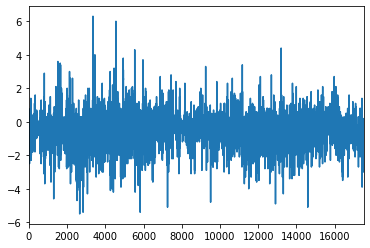

In [8]:
# Plot the difference between the two station to check,
# if we should take just one station for simplicity or take a mean of the two
check_station_differences = temperature_station_1975['TEMPERATURE'].subtract(temperature_station_1981['TEMPERATURE'])
check_station_differences.plot()

In [9]:
check_station_differences.describe()

count    17520.000000
mean        -0.506558
std          0.786722
min         -5.500000
25%         -0.900000
50%         -0.400000
75%         -0.100000
max          6.300000
Name: TEMPERATURE, dtype: float64

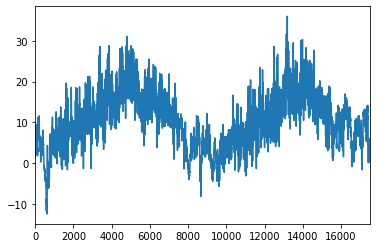

In [10]:
# The values are too far from each other in their maxima (>5 degrees)
# So we will complete the temperature data by taking the average of each station
temperature_data = pd.DataFrame({'DATE' : temperature_station_1975['DATE'],
                                 'TEMPERATURE': (temperature_station_1975['TEMPERATURE']
                                                 +temperature_station_1975['TEMPERATURE'])/2})

temperature_data['TEMPERATURE'].plot()

In [11]:
# Precipitation Data

# Define the Filepath for Stations 1975 and 1981
filepath_precipitation_dict = ['precipitation_station_01975.csv','precipitation_station_01981.csv']

# Read the .csv files from the stations 1975 and 1981
precipitation_station_1975 = pd.read_csv(filepath_precipitation_dict[0], sep=';', usecols=[0,1,3])
precipitation_station_1981 = pd.read_csv(filepath_precipitation_dict[1], sep=';', usecols=[0,1,3])

# Rename the columns to clearly know what they stand for
precipitation_station_1975.columns = ['ID','DATE','PRECIPITATION']
precipitation_station_1981.columns = ['ID','DATE','PRECIPITATION']

In [12]:
#Format the Dates from Object to DateTime Types
precipitation_station_1975['DATE'] = pd.to_datetime(precipitation_station_1975['DATE'], format='%Y%m%d%H')
precipitation_station_1981['DATE'] = pd.to_datetime(precipitation_station_1981['DATE'], format='%Y%m%d%H')

In [13]:
#Filter for the Data from 2014-2015
precipitation_station_1975 = precipitation_station_1975[(precipitation_station_1975['DATE'] > date_after) 
                                                        &
                                                        (precipitation_station_1975['DATE'] < date_before)]
precipitation_station_1981 = precipitation_station_1981[(precipitation_station_1981['DATE'] > date_after)
                                                        & 
                                                        (precipitation_station_1981['DATE'] < date_before)]

#Reset indices
precipitation_station_1975.reset_index(drop=True, inplace=True)
precipitation_station_1981.reset_index(drop=True, inplace=True)

In [14]:
# Check for missing values
print('Absolute values missing for station 1975 are: ',
      precipitation_station_1975['PRECIPITATION'][precipitation_station_1975['PRECIPITATION'] == -999.0].count())
print('Absolute values missing for station 1981 are: ',
      precipitation_station_1981['PRECIPITATION'][precipitation_station_1981['PRECIPITATION'] == -999.0].count())


Absolute values missing for station 1975 are:  20
Absolute values missing for station 1981 are:  0


In [15]:
# Handle missing value by just using the other stations data at that exact time
index_of_missing_value = precipitation_station_1975.index[precipitation_station_1975['PRECIPITATION'] ==-999.0]
value = precipitation_station_1981.loc[index_of_missing_value]['PRECIPITATION']
precipitation_station_1975.at[index_of_missing_value, 'PRECIPITATION'] = value


In [16]:
# Check if we handled all the missing values

print('Absolute values missing for station 1975 are: ',
      precipitation_station_1975['PRECIPITATION'][precipitation_station_1975['PRECIPITATION'] == -999.0].count())

Absolute values missing for station 1975 are:  0


In [17]:
# Check the count of the two datasets
print(len(precipitation_station_1975),len(precipitation_station_1981))

17515 17512


In [18]:
# We need to merge the datasets because both have missing hours (!=17520 values) 
precipitation_merge = pd.merge(precipitation_station_1975, precipitation_station_1981, on='DATE')

In [19]:
# Define the precipitation DataFrame from the merged data
precipitation_data = pd.DataFrame({'DATE' : precipitation_merge['DATE'], 
                                   'PRECIPITATION' : (precipitation_merge['PRECIPITATION_x']
                                                      +
                                                      precipitation_merge['PRECIPITATION_y'])/2})

Text(0.5, 1.0, 'Hourly Precipitation')

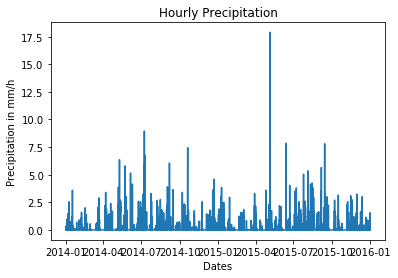

In [20]:
# Plot the precipitation by the hour in mm, so we know what we are dealing with
plt.plot(precipitation_data['DATE'], precipitation_data['PRECIPITATION'])
plt.xlabel('Dates')
plt.ylabel('Precipitation in mm/h')
plt.title('Hourly Precipitation')

In [21]:
bike_data.index = bike_data.DATE_BOOKING
monthly_data_bike = []

for i in range(1,13):
    monthly_data_bike.append([i,bike_data['DATE_BOOKING'].loc[(bike_data['DATE_BOOKING'].dt.month) == i].count()])

monthly_data_bike = pd.DataFrame(monthly_data_bike)

In [22]:
monthly_data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
0    12 non-null int64
1    12 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


# Bike Bookings per Month

<BarContainer object of 12 artists>

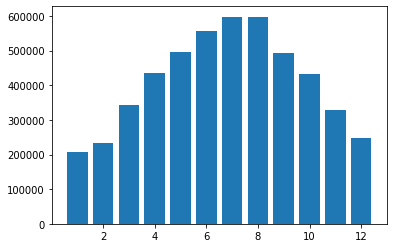

In [23]:
plt.bar(monthly_data_bike[0],monthly_data_bike[1])

In [24]:
dayofweek_data_bike = []

for i in range(0,7):
    dayofweek_data_bike.append([i,bike_data['DATE_BOOKING'].loc[(bike_data['DATE_BOOKING'].dt.dayofweek) == i].count()])

dayofweek_data_bike = pd.DataFrame(dayofweek_data_bike)


In [25]:
dayofweek_data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
0    7 non-null int64
1    7 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [26]:
dayofweek_data_bike[1].cumsum()

0     696991
1    1406901
2    2156079
3    2915664
4    3676984
5    4355602
6    4967144
Name: 1, dtype: int64

# Bike bookings per day of the week

<BarContainer object of 7 artists>

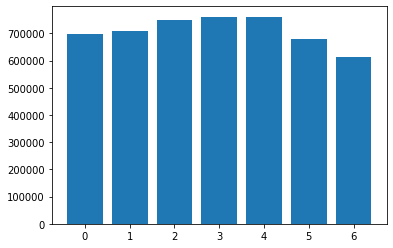

In [27]:
plt.bar(dayofweek_data_bike[0],dayofweek_data_bike[1])

In [28]:
hourofday_data_bike = []

for i in range(0,24):
    hourofday_data_bike.append([i,bike_data['DATE_BOOKING'].loc[(bike_data['DATE_BOOKING'].dt.hour) == i].count()])

hourofday_data_bike = pd.DataFrame(hourofday_data_bike)



In [29]:
hourofday_data_bike

,0,1
0,0,105380
1,1,78960
2,2,53020
3,3,37020
4,4,26594
5,5,25537
6,6,52639
7,7,167168
8,8,323568
9,9,222917


# Bike bookings per hour of day

<BarContainer object of 24 artists>

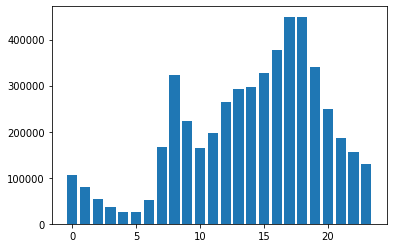

In [30]:
plt.bar(hourofday_data_bike[0],hourofday_data_bike[1])

In [31]:
bike_data['TIME_BOOKED'] = bike_data['DATE_UNTIL'] - bike_data['DATE_FROM']

In [32]:
bike_data.TIME_BOOKED.describe()

count                   4967144
mean     0 days 00:24:26.827739
std      0 days 03:10:34.307310
min             0 days 00:00:01
25%             0 days 00:07:22
50%             0 days 00:12:48
75%             0 days 00:20:53
max            92 days 03:57:55
Name: TIME_BOOKED, dtype: object

In [33]:
time_booked = bike_data.TIME_BOOKED
time_booked.index

DatetimeIndex(['2014-01-01 00:34:54', '2014-01-01 01:39:55',
               '2014-01-01 01:40:20', '2014-01-01 01:56:00',
               '2014-01-01 02:05:55', '2014-01-01 02:29:03',
               '2014-01-01 03:07:07', '2014-01-01 03:12:50',
               '2014-01-01 04:27:51', '2014-01-01 04:58:33',
               ...
               '2015-12-31 19:38:37', '2015-12-31 20:57:37',
               '2015-12-31 23:46:35', '2015-12-31 20:16:35',
               '2015-12-31 20:39:33', '2015-12-31 23:15:08',
               '2015-12-31 23:28:26', '2015-12-31 22:40:18',
               '2015-12-31 23:37:41', '2015-12-31 22:08:26'],
              dtype='datetime64[ns]', name='DATE_BOOKING', length=4967144, freq=None)

In [34]:
time_booked

DATE_BOOKING
2014-01-01 00:34:54   00:15:20
2014-01-01 01:39:55   00:17:32
2014-01-01 01:40:20   00:12:49
2014-01-01 01:56:00   00:00:41
2014-01-01 02:05:55   00:07:54
                        ...   
2015-12-31 23:15:08   00:21:45
2015-12-31 23:28:26   00:14:40
2015-12-31 22:40:18   00:08:16
2015-12-31 23:37:41   00:09:32
2015-12-31 22:08:26   00:25:06
Name: TIME_BOOKED, Length: 4967144, dtype: timedelta64[ns]

In [35]:
hourofday_data_time = []

def integer_to_time_hour(a):
    if a < 10:
        output = str('0'+str(a)+':00')
    else:
        output = str(str(a)+':00')
    return output
    
for i in range(0,24):
    hourofday_data_time.append([integer_to_time_hour(i),time_booked.loc[(bike_data['DATE_BOOKING'].dt.hour) == i].mean()/ datetime.timedelta(minutes=1)])

hourofday_data_time = pd.DataFrame(hourofday_data_time)

In [36]:
hourofday_data_time

,0,1
0,00:00,20.527261
1,01:00,20.708753
2,02:00,22.985676
3,03:00,20.776746
4,04:00,21.219511
5,05:00,18.389142
6,06:00,16.689708
7,07:00,16.932393
8,08:00,18.283801
9,09:00,22.087202


# Average length of booking in minutes per hour of day

<BarContainer object of 24 artists>

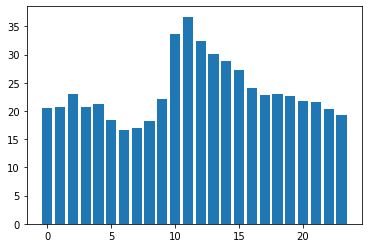

In [37]:
plt.bar(hourofday_data_time.index,hourofday_data_time[1])

In [38]:
dayofweek_data_time = []

for i in range(0,7):
    dayofweek_data_time.append([i,time_booked.loc[(bike_data['DATE_BOOKING'].dt.dayofweek) == i].mean()
                                / datetime.timedelta(minutes=1)])

dayofweek_data_time = pd.DataFrame(dayofweek_data_time)

In [39]:
dayofweek_data_time[2] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dayofweek_data_time

,0,1,2
0,0,21.416573,Mon
1,1,21.268400,Tue
2,2,21.392258,Wed
3,3,22.537333,Thu
4,4,24.741184,Fri
5,5,31.717097,Sat
6,6,29.272269,Sun


# Average length of booking per day of week

<BarContainer object of 7 artists>

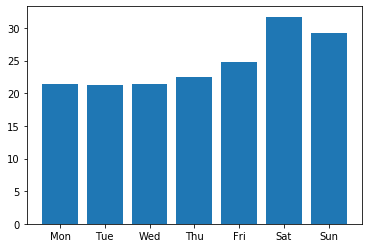

In [40]:
plt.bar(dayofweek_data_time[2],dayofweek_data_time[1])

In [41]:
monthly_data_time = []

for i in range(1,13):
    monthly_data_time.append([i,time_booked.loc[(bike_data['DATE_BOOKING'].dt.month) == i].mean()
                             / datetime.timedelta(minutes=1)])

monthly_data_time = pd.DataFrame(monthly_data_time)

monthly_data_time

,0,1
0,1,19.361096
1,2,21.269169
2,3,22.194142
3,4,24.621341
4,5,26.576400
5,6,25.722896
6,7,26.740298
7,8,28.271142
8,9,24.405386
9,10,22.857207


In [42]:
# Average length of booking per month

<BarContainer object of 12 artists>

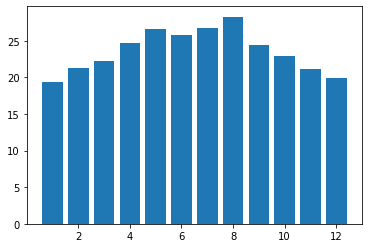

In [43]:
plt.bar(monthly_data_time[0],monthly_data_time[1])

In [44]:
# Mean start time day of week

In [45]:
time_booked

DATE_BOOKING
2014-01-01 00:34:54   00:15:20
2014-01-01 01:39:55   00:17:32
2014-01-01 01:40:20   00:12:49
2014-01-01 01:56:00   00:00:41
2014-01-01 02:05:55   00:07:54
                        ...   
2015-12-31 23:15:08   00:21:45
2015-12-31 23:28:26   00:14:40
2015-12-31 22:40:18   00:08:16
2015-12-31 23:37:41   00:09:32
2015-12-31 22:08:26   00:25:06
Name: TIME_BOOKED, Length: 4967144, dtype: timedelta64[ns]

# Average Booking Start Time per Week (in hours)

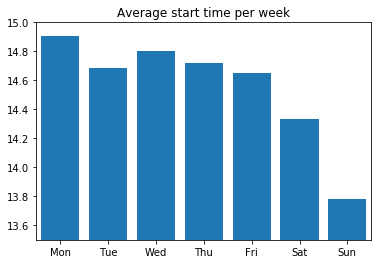

In [46]:
dayofweek_mean = []
daysofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(0,7):
    dayofweek_mean.append(bike_data['DATE_FROM'].loc[(bike_data['DATE_FROM'].dt.dayofweek) == i])

dayofweek_averages = []
avg = 0

for i in range(0,7):
    for elem in dayofweek_mean[i]:
        avg += (elem.hour*3600+elem.minute*60+elem.second)
    dayofweek_averages.append(avg/len(dayofweek_mean[i])/60/60)
    avg = 0

dayofweek_averages = pd.Series(dayofweek_averages)

plt.bar(daysofweek, dayofweek_averages)
plt.axis([-0.5,6.5,13.5, 15])
plt.title('Average start time per week')
plt.show()

# Average Start Time per Month (in hours)

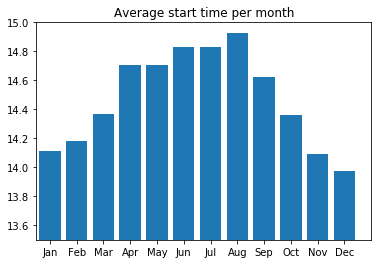

In [47]:
monthly_mean = []
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(1,13):
    monthly_mean.append(bike_data['DATE_FROM'].loc[(bike_data['DATE_FROM'].dt.month) == i])

monthly_averages = []
avg = 0

for i in range(0,12):
    for elem in monthly_mean[i]:
        avg += (elem.hour*3600+elem.minute*60+elem.second)
    monthly_averages.append(avg/len(monthly_mean[i])/60/60)
    avg = 0

monthly_averages = pd.Series(monthly_averages)

plt.bar(months, monthly_averages)
plt.axis([-0.5,12,13.5, 15])
plt.title('Average start time per month')
plt.show()

# Patterns Start and End Location

In [48]:
bike_data = bike_data.reset_index(drop=True)

unique_start_location = pd.Series(bike_data.START_RENTAL_ZONE.unique())
unique_end_location = pd.Series(bike_data.END_RENTAL_ZONE.unique())

In [49]:
unique_end_location = unique_end_location.sort_values()

In [50]:
bike_data['START_RENTAL_ZONE'].describe()

count                      4967003
unique                         188
top       Allende-Platz/Grindelhof
freq                        108582
Name: START_RENTAL_ZONE, dtype: object

In [51]:
bike_data.index = bike_data.DATE_FROM

In [52]:
start_rental_zone = pd.Series(bike_data.groupby('START_RENTAL_ZONE')['DATE_BOOKING'].count())

In [53]:
start_rental_zone.sort_values(ascending = False)[0:10]

START_RENTAL_ZONE
Allende-Platz/Grindelhof                 108582
Schulterblatt/Eifflerstraße               97741
Jungfernstieg / Ballindamm                77697
Goldbekplatz / Semperstraße               76981
Neuer Pferdemarkt / Beim Grünen Jäger     75337
Jarrestraße / Rambatzweg                  73937
Mundsburg / Schürbeker Straße             73518
Lange Reihe / Lohmühlenpark               72334
Eduard-Rhein-Ufer / Schwanenwik           71488
Landungsbrücke/Hafentor                   71348
Name: DATE_BOOKING, dtype: int64

<img src="hamburg_most_used_start_locations.png">

In [54]:
end_rental_zone = pd.Series(bike_data.groupby('END_RENTAL_ZONE')['DATE_BOOKING'].count())

In [55]:
end_rental_zone.sort_values(ascending = False)[0:10]

END_RENTAL_ZONE
Allende-Platz/Grindelhof                 109754
Schulterblatt/Eifflerstraße               97680
Jungfernstieg / Ballindamm                81811
Landungsbrücke/Hafentor                   79233
Goldbekplatz / Semperstraße               77748
Jarrestraße / Rambatzweg                  75641
Neuer Pferdemarkt / Beim Grünen Jäger     75390
Mundsburg / Schürbeker Straße             73663
Eduard-Rhein-Ufer / Schwanenwik           72802
Lange Reihe / Lohmühlenpark               72602
Name: DATE_BOOKING, dtype: int64

In [56]:
bike_data.groupby('START_RENTAL_ZONE')['TIME_BOOKED'].sum().sort_values(ascending=False)[0:10]

START_RENTAL_ZONE
Landungsbrücke/Hafentor                  1960 days 05:19:26
Schulterblatt/Eifflerstraße              1523 days 03:37:00
Allende-Platz/Grindelhof                 1520 days 20:39:42
Jungfernstieg / Neuer Jungfernstieg      1453 days 05:46:06
Jungfernstieg / Ballindamm               1443 days 08:35:35
Hauptbahnhof Ost / Hachmannplatz         1421 days 08:40:08
Hauptbahnhof West / Glockengießer Wall   1385 days 20:50:04
Goldbekplatz / Semperstraße              1374 days 07:44:36
Eduard-Rhein-Ufer / Schwanenwik          1251 days 16:45:05
Jarrestraße / Rambatzweg                 1230 days 14:08:04
Name: TIME_BOOKED, dtype: timedelta64[ns]

In [57]:
location_patterns = pd.DataFrame({
    'START+END': bike_data.START_RENTAL_ZONE+'-->'+bike_data.END_RENTAL_ZONE,
    'TIME' : bike_data.TIME_BOOKED
})

In [58]:
location_patterns.groupby('START+END')['TIME'].sum().sort_values(ascending= False)[0:20]

START+END
Landungsbrücke/Hafentor-->Landungsbrücke/Hafentor                                 384 days 13:43:36
BSCTerminal FFM 2.OG R 2.21-->BSCTerminal FFM 2.OG R 2.21                         305 days 04:55:34
Goldbekplatz / Semperstraße-->Goldbekplatz / Semperstraße                         245 days 04:32:30
Funkbox-BSC-HH-->Funkbox-BSC-HH                                                   212 days 14:26:54
Kümmellstraße / Robert-Koch-Straße-->Kümmellstraße / Robert-Koch-Straße           207 days 09:17:59
Methfesselstraße/Luruper Weg-->Methfesselstraße/Luruper Weg                       204 days 10:22:06
Jungfernstieg / Neuer Jungfernstieg-->Jungfernstieg / Neuer Jungfernstieg         192 days 14:10:24
Horner Rennbahn/ Meurer Weg-->Funkbox-BSC-HH                                      192 days 02:44:11
Hauptbahnhof Ost / Hachmannplatz-->Hauptbahnhof Ost / Hachmannplatz               189 days 09:48:07
Eduard-Rhein-Ufer / Schwanenwik-->Eduard-Rhein-Ufer / Schwanenwik                 183 days

<BarContainer object of 7 artists>

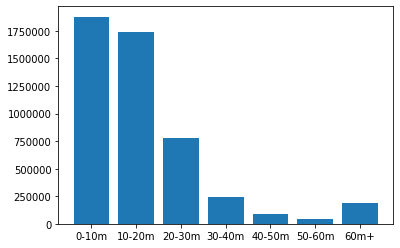

In [59]:
time_intervals = ['0-10m', '10-20m', '20-30m', '30-40m', '40-50m', '50-60m', '60m+']
time_intervals_count = [bike_data[bike_data['TIME_BOOKED'] <= pd.Timedelta(10, unit='m')].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(10, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(20, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(20, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(30, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(30, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(40, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(40, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(50, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(50, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(60, unit='m'))].count()[0],
                        bike_data[bike_data['TIME_BOOKED'] > pd.Timedelta(60, unit='m')].count()[0]]

time_intervals_data = pd.DataFrame({'TIME_INTERVAL': time_intervals,
                                    'COUNT': time_intervals_count})

plt.bar(time_intervals_data['TIME_INTERVAL'], time_intervals_data['COUNT'])

<BarContainer object of 7 artists>

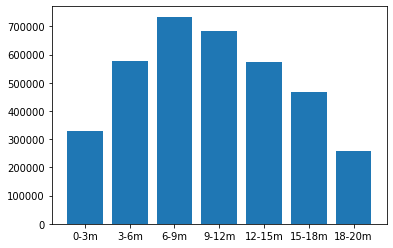

In [60]:
time_intervals_detailed = ['0-3m', '3-6m', '6-9m', '9-12m', '12-15m', '15-18m', '18-20m']
time_intervals_detailed_count = [bike_data[bike_data['TIME_BOOKED'] <= pd.Timedelta(3, unit='m')].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(3, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(6, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(6, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(9, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(9, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(12, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(12, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(15, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(15, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(18, unit='m'))].count()[0],
                        bike_data[(bike_data['TIME_BOOKED'] > pd.Timedelta(18, unit='m')) &
                                 (bike_data['TIME_BOOKED'] <= pd.Timedelta(20, unit='m'))].count()[0]]

time_intervals_detailed_data = pd.DataFrame({'TIME_INTERVAL': time_intervals_detailed,
                                    'COUNT': time_intervals_detailed_count})

plt.bar(time_intervals_detailed_data['TIME_INTERVAL'], time_intervals_detailed_data['COUNT'])

Most bookings tend to be under an hour. <br>
There are only <b>3.8%</b> (188863 / 4967144 = 0.038) bookings which lasted <b>over one hour</b>. <br>
<b>38.7%</b> of bookings were used <b>0-10 min</b> which is the highest count using 10min intervals ( 1879106 / 4967144 = 0.378 = 37.8%). <br>
More specifically going into smaller 3 minute intervals under 20min time booked, the most used interval is the <b>6-9min</b> range with <b>14.8%</b> of all bookings (734036 / 4967144 = 0.148).<br>
Zero to twenty minutes of time booked is the majority with <b>72.9%</b> ((1879106+1743423) / 4967144 = 0.729).

In [61]:
time_intervals_count

[1879106, 1743423, 778203, 241305, 89781, 46463, 188863]

# Cluster Analysis

In [133]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [137]:
locations_dict = dict()
i = 1
for item in bike_data['START_RENTAL_ZONE'].unique():
    locations_dict[item] = i
    i += 1

X = pd.DataFrame({
    'START' : (bike_data['DATE_FROM'].dt.hour)*60+(bike_data['DATE_FROM'].dt.minute),
    'LENGTH': bike_data['TIME_BOOKED'] / datetime.timedelta(minutes = 1),
    'LOCATION_START' : bike_data['START_RENTAL_ZONE']})

X['LOCATION_START']= X['LOCATION_START'].map(locations_dict) 
X.dropna(axis = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df = X_scaled_df.reset_index(drop=True)
X_scaled_df.head()

,START,LENGTH,LOCATION_START
0,-2.589747,-0.047823,-1.505877
1,-2.389338,-0.036279,-1.480765
2,-2.386254,-0.061029,-1.455653
3,-2.336923,-0.124697,-1.430540
4,-2.309174,-0.086829,-1.405428


In [138]:
k_max = 50
clusters = []
losses = []

def run_k_loop():
    for k in range(k_max):
        model = KMeans(n_clusters=k+1)
        model.fit(X_scaled)
        clusters.append(k+1)
        losses.append(model.inertia_)

In [139]:
%timeit run_k_loop()

KeyboardInterrupt: 

In [ ]:
plt.plot(clusters, losses)
plt.show()

In [ ]:
plt.plot(clusters, losses)
plt.xlim([0,10])

In [ ]:
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)
two_means.predict(X_scaled)

In [ ]:
numbers = ["zero", "one", "two", "three"]

X_scaled_df["two"] = two_means.predict(X_scaled)
X_scaled_df["two"] = X_scaled_df["two"].apply(lambda x: numbers[x])
sns.pairplot(data=X_scaled_df, hue="two")

# Predictive Analysis

In [ ]:
data = pd.DataFrame({'DATE' : pd.date_range(start='1/1/2014', end='31/12/2015 23:00:00', freq='H')})

In [ ]:
data.index = data.DATE
temperature_data.index = temperature_data['DATE']
precipitation_data.index = precipitation_data['DATE']

In [ ]:
data['TEMPERATURE'] = temperature_data['TEMPERATURE']
data['PRECIPITATION'] = precipitation_data['PRECIPITATION']
data['BOOKING_COUNT'] = hourly_bike_data

In [ ]:
data